In [1]:
import shap
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
shap.initjs()

In [2]:
# 加载示例数据集
data = sklearn.datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# 训练随机森林分类器
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Using 114 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/114 [00:00<?, ?it/s]

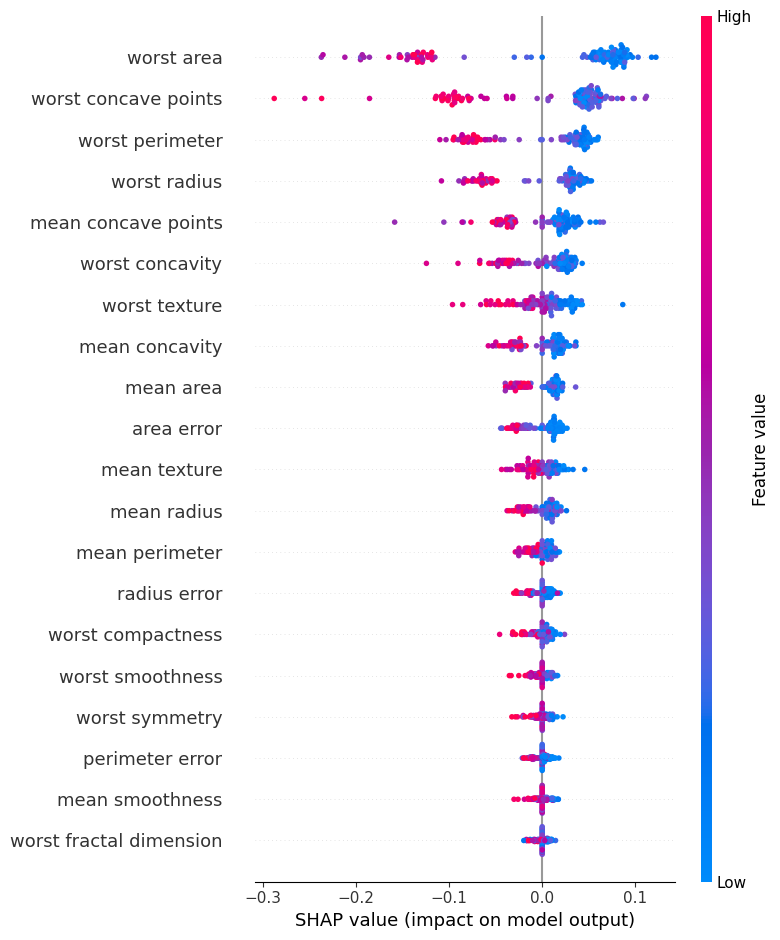

In [3]:
# 创建KernelExplainer 传入特征名 后续使用shap_value_object = explainer(X_test) 将shap_value_object带入绘图时可以不需要传入特征名
# 重要的是 有些绘图函数不支持传入特证名
explainer = shap.KernelExplainer(model.predict, X_test,feature_names=data.feature_names)

# 解释样本点
shap_values = explainer.shap_values(X_test)

# 生成摘要图
shap.summary_plot(shap_values, X_test, feature_names=data.feature_names)  # 替换特征名

In [4]:
print(np.mean(model.predict(X_test)))
explainer.expected_value

0.6403508771929824


0.6403508771929824

  0%|          | 0/1 [00:00<?, ?it/s]

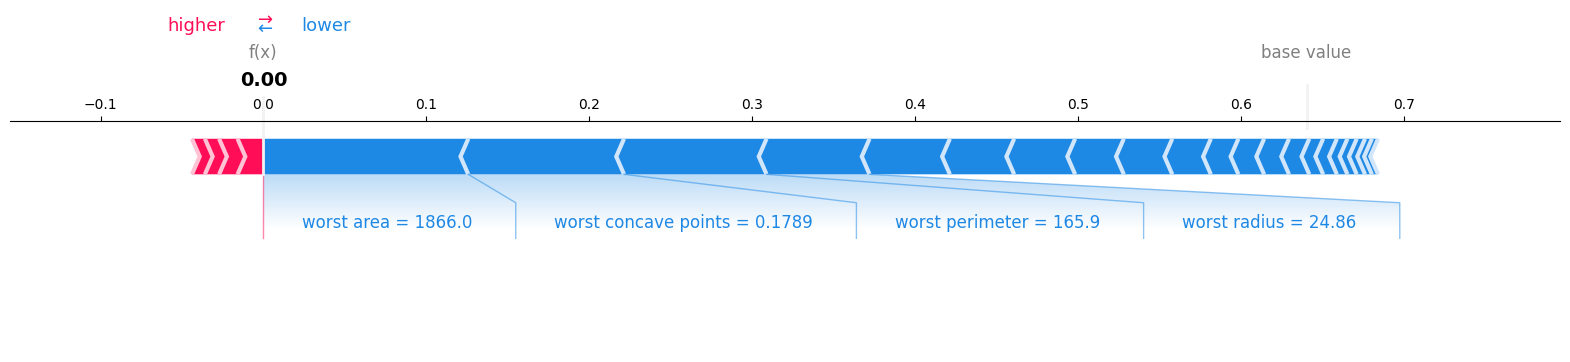

In [5]:
# 选择一个样本点，这里选择测试集的第一个样本点
single_sample = X_test[1]
 
# 使用LinearExplainer绘制单个样本点的SHAP值
shap_values_single = explainer.shap_values(single_sample.reshape(1, -1))

# 绘制局部摘要图（即SHAP值的条形图） 
shap.initjs() # 初始化JS可视化环境
shap.force_plot(explainer.expected_value, shap_values_single,single_sample, feature_names=data.feature_names,matplotlib=True)

In [6]:
shap.force_plot(explainer.expected_value, shap_values, X_test,show=False,feature_names=data.feature_names)

In [7]:
shap.force_plot(explainer.expected_value, shap_values, X_test,show=False,feature_names=data.feature_names)

In [12]:
shap.force_plot(explainer.expected_value, shap_values, X_test,show=False,feature_names=data.feature_names)

In [9]:
shap_value_object = explainer(X_test)

  0%|          | 0/114 [00:00<?, ?it/s]

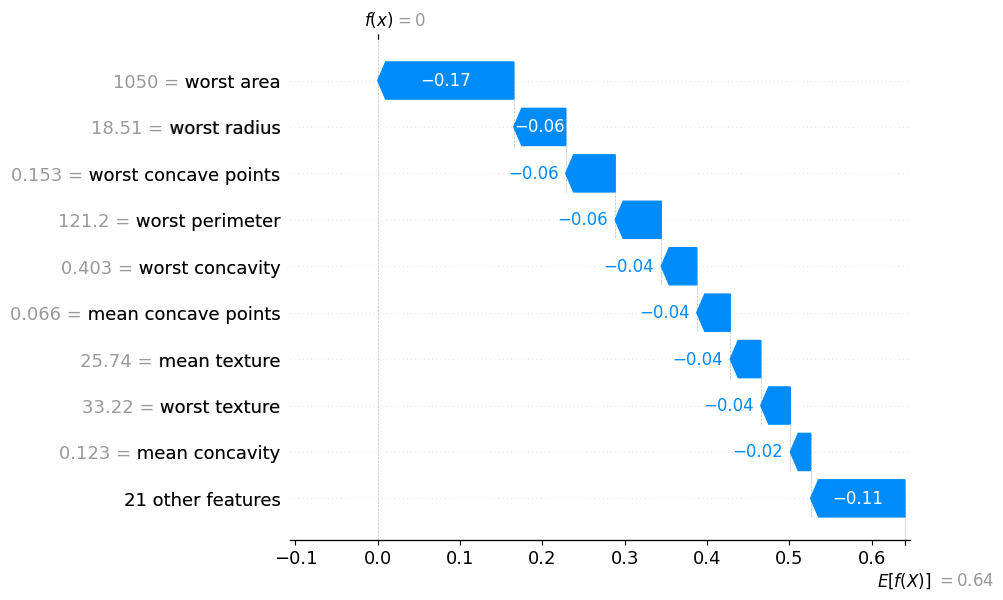

In [32]:
shap.waterfall_plot(shap_value_object[41])

In [13]:
shap.force_plot(shap_value_object)

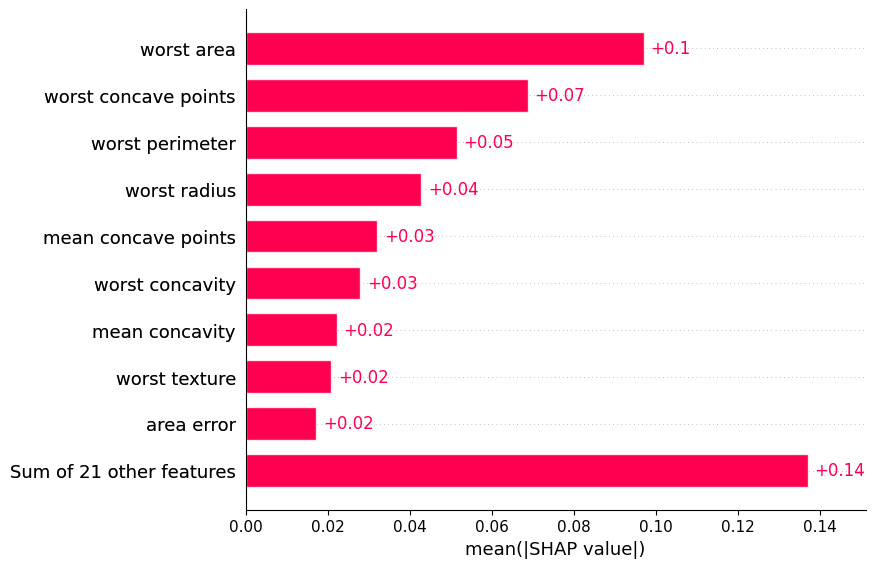

In [16]:
shap.plots.bar(shap_value_object)

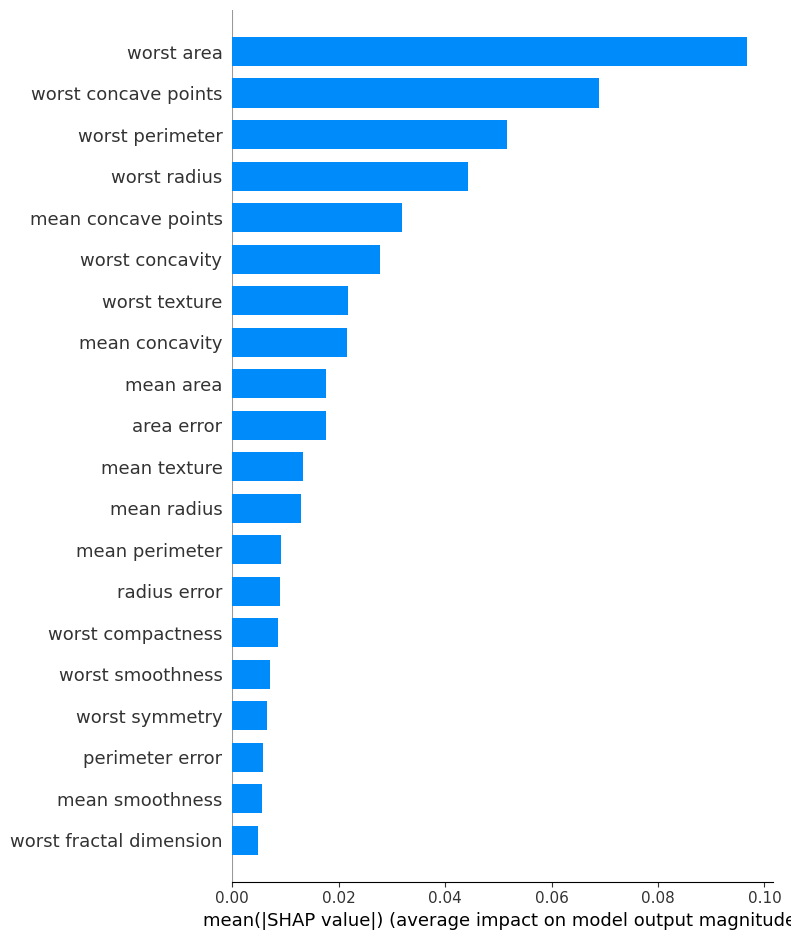

In [43]:
# 生成摘要图
shap.summary_plot(shap_values, X_test, feature_names=data.feature_names,plot_type='bar')  # 替换特征名

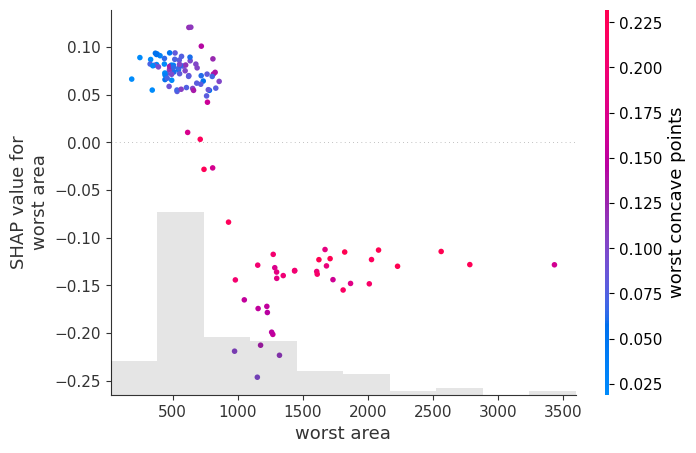

In [40]:
shap.plots.scatter(shap_value_object[:, "worst area"], color=shap_value_object)